# Importing Libraries

In [109]:
import numpy as np
import pandas as pd 
import nltk

In [110]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1') 

In [111]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [112]:
df.shape

(5572, 5)

# Data Cleaning

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [114]:
# Drop last 3 Columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 2','Unnamed: 4'],inplace=True)

In [115]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [116]:
# Rename Cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [117]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [118]:
df['target']=encoder.fit_transform(df['target'])

In [119]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [120]:
# Missing Values
df.isnull().sum()

target    0
text      0
dtype: int64

In [121]:
df.duplicated().sum()

403

In [122]:
df=df.drop_duplicates(keep='first')
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [123]:
df.duplicated().sum()

0

In [124]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [125]:
# Num Characters
df['length']=df['text'].apply(len)

In [126]:
df.head()

,target,text,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


# Plot

<Axes: ylabel='Frequency'>

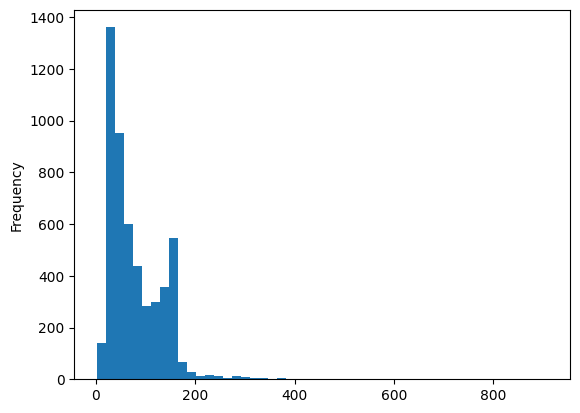

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

df['length'].plot(bins=50,kind='hist')

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

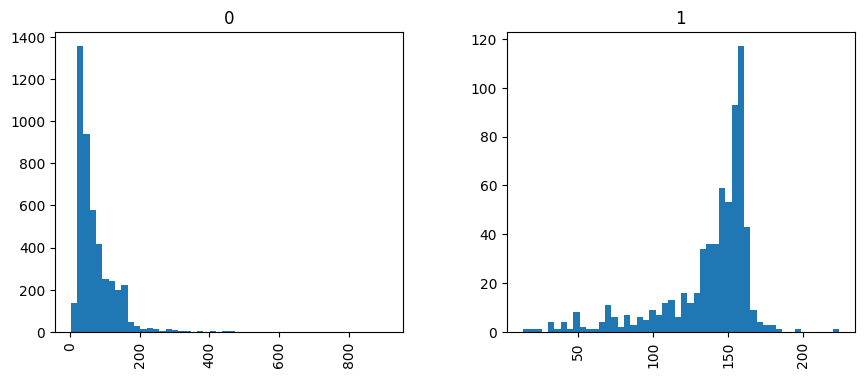

In [128]:
# 0 for Harm and 1 for Spam
df.hist(column='length',by='target',bins=50,figsize=(10,4))

# Implemented Bag Words

In [129]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
count = CountVectorizer()
input=['Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&Cs apply 08452810075over18s	']

text=count.fit_transform(df['text'],input)
x_train,x_test,y_train,y_test=train_test_split(text,df['target'],test_size=0.20,random_state=1)
text

<5169x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 68018 stored elements in Compressed Sparse Row format>

In [130]:
x_train.shape
x_test.shape
input = text[5168]

# Implementation of ML Model

In [131]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

In [132]:
prediction=model.predict(x_test)
print(prediction)

[0 0 0 ... 0 0 1]


# Logistic Regression

In [134]:
from sklearn.linear_model import LogisticRegression

In [135]:
log=LogisticRegression()

In [136]:
log.fit(x_train,y_train)

LogisticRegression()

In [137]:
y_pred1=log.predict(x_test)

In [138]:
from sklearn.metrics import accuracy_score

In [139]:
accuracy_score(y_test,y_pred1)

0.965183752417795

In [140]:
accuracy_score(y_test,y_pred1)

0.965183752417795

In [141]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [142]:
print('ACCURACY_SCORE:',accuracy_score(y_test,prediction))

ACCURACY_SCORE: 0.9758220502901354


In [143]:
print('PRECISION_SCORE:',precision_score(y_test,prediction))

PRECISION_SCORE: 0.8873239436619719


In [144]:
print('ACCURACY_SCORE:',recall_score(y_test,prediction))

ACCURACY_SCORE: 0.9333333333333333


In [145]:
print('ACCURACY_SCORE:',f1_score(y_test,prediction))

ACCURACY_SCORE: 0.9097472924187726


# SVM

In [147]:
from sklearn import svm

In [148]:
svm=svm.SVC()

In [149]:
svm.fit(x_train,y_train)

SVC()

In [150]:
y_pred2=svm.predict(x_test)

In [151]:
accuracy_score(y_test,y_pred2)

0.9709864603481625

In [152]:
precision_score(y_test,y_pred2)

0.9906542056074766

In [153]:
recall_score(y_test,y_pred2)

0.7851851851851852

In [154]:
f1_score(y_test,y_pred2)

0.8760330578512396

In [155]:
model.predict(input)

array([0])